In [4]:
#@title TASK 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

red = pd.read_excel("redvine_quality.xlsx")
white = pd.read_excel("whitevine_quality.xlsx")

X_red, y_red = red.drop("quality", axis=1), red["quality"]
X_white, y_white = white.drop("quality", axis=1), white["quality"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_red, y_red, test_size=0.2, random_state=0, stratify=y_red)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_white, y_white, test_size=0.2, random_state=0, stratify=y_white)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

results = []

settings = [
    ("gini", 0.0, "Gini (No Pruning)"),
    ("gini", 0.015, "Gini (Pruning)"),
    ("entropy", 0.0, "Entropy (No Pruning)"),
    ("entropy", 0.015, "Entropy (Pruning)")
]

for criterion, alpha, name in settings:
    # Red
    dt_red = DecisionTreeClassifier(criterion=criterion, ccp_alpha=alpha, random_state=0)
    dt_red.fit(Xr_train, yr_train)
    train_acc_red = accuracy_score(yr_train, dt_red.predict(Xr_train))
    test_acc_red = accuracy_score(yr_test, dt_red.predict(Xr_test))

    # White
    dt_white = DecisionTreeClassifier(criterion=criterion, ccp_alpha=alpha, random_state=0)
    dt_white.fit(Xw_train, yw_train)
    train_acc_white = accuracy_score(yw_train, dt_white.predict(Xw_train))
    test_acc_white = accuracy_score(yw_test, dt_white.predict(Xw_test))

    results.append([name, train_acc_red, test_acc_red, train_acc_white, test_acc_white])

results_df = pd.DataFrame(results, columns=["Method", "Red Train Acc", "Red Test Acc", "White Train Acc", "White Test Acc"])
print(results_df)

                 Method  Red Train Acc  Red Test Acc  White Train Acc  \
0     Gini (No Pruning)       1.000000      0.603125         1.000000   
1        Gini (Pruning)       0.566067      0.525000         0.511996   
2  Entropy (No Pruning)       1.000000      0.625000         1.000000   
3     Entropy (Pruning)       0.587177      0.571875         0.526034   

   White Test Acc  
0        0.616327  
1        0.492857  
2        0.626531  
3        0.512245  


In [8]:
#white train
dt_entropy_pruned = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.015, random_state=0)
dt_entropy_pruned.fit(Xw_train, yw_train)

y_pred_white = dt_entropy_pruned.predict(Xw_test)

comparison = pd.DataFrame({"Actual Output": yw_test.values, "Predictions": y_pred_white})
print(comparison.head(20))  # Show first 20

correct = (comparison["Actual Output"] == comparison["Predictions"]).sum()
total = len(comparison)
print(f"Correctly Predict: {correct} Out of {total}")
print("Wrong Predictions:", total - correct)


    Actual Output  Predictions
0               8            6
1               7            6
2               7            6
3               6            6
4               7            6
5               4            6
6               5            6
7               6            6
8               3            6
9               6            6
10              5            5
11              6            6
12              5            5
13              6            6
14              6            6
15              6            6
16              6            6
17              6            6
18              6            6
19              6            6
Correctly Predict: 502 Out of 980
Wrong Predictions: 478


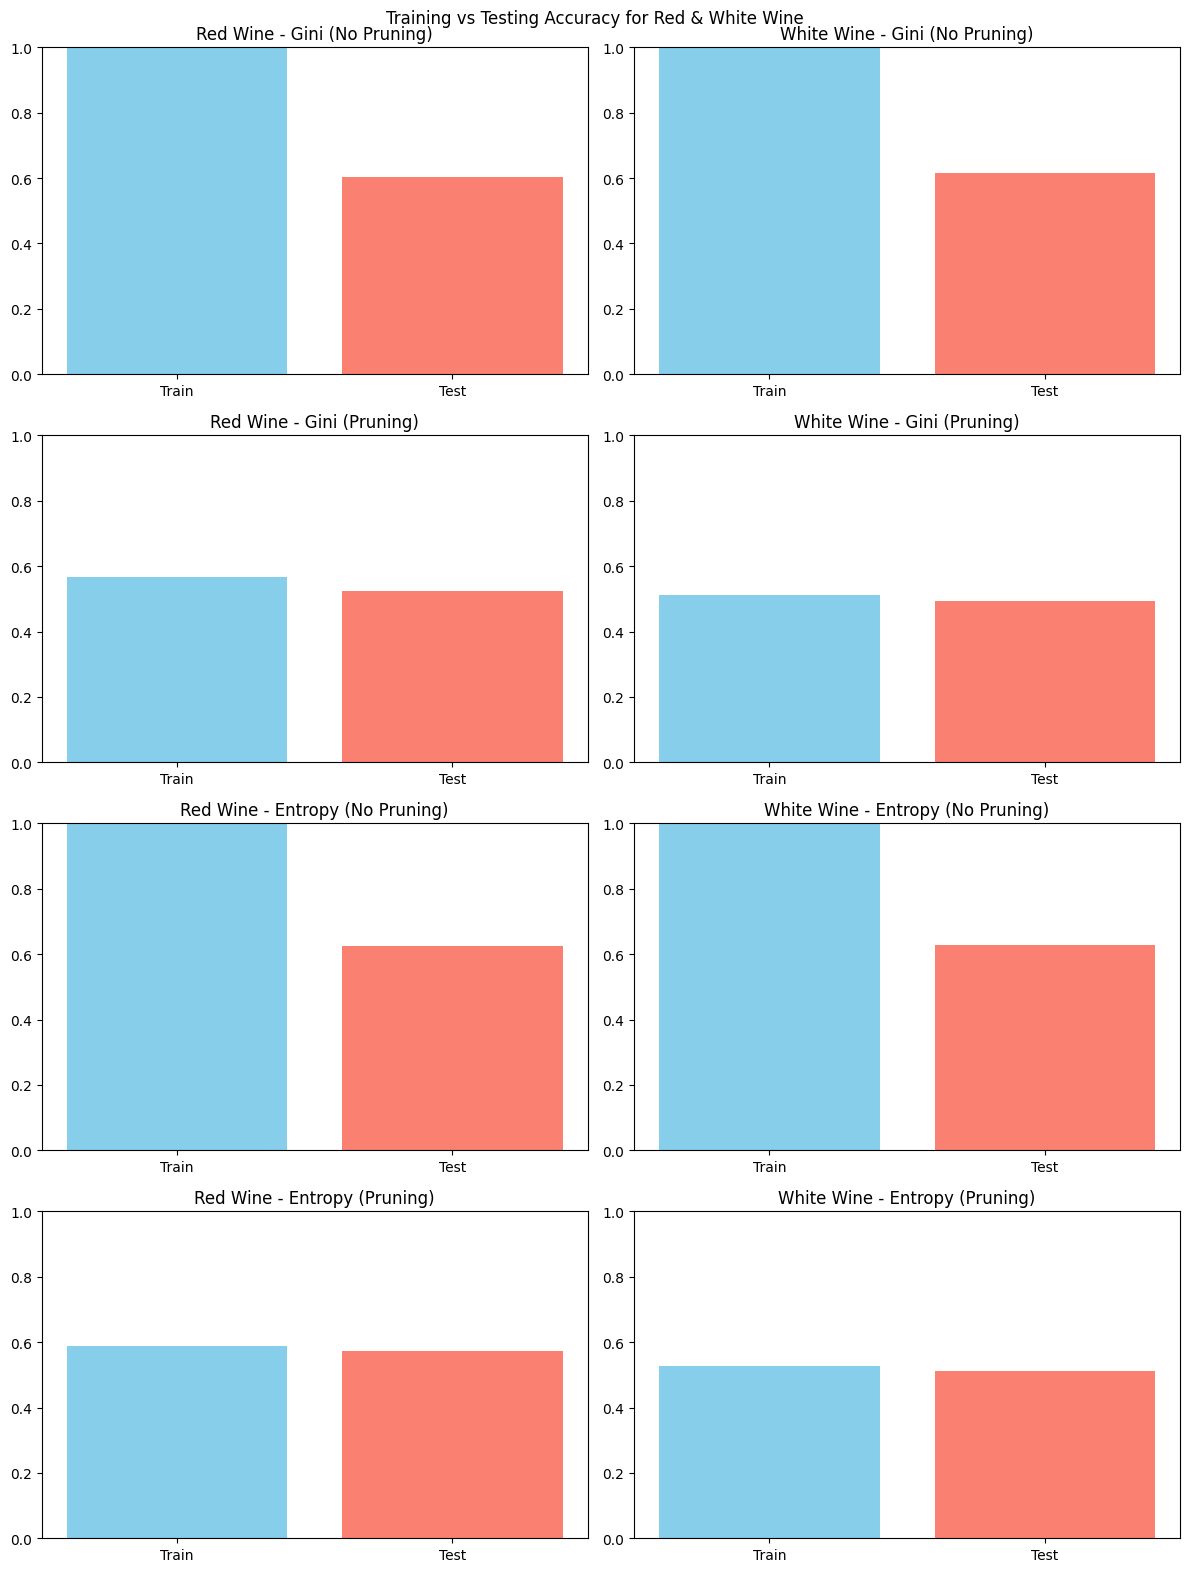

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle("Training vs Testing Accuracy for Red & White Wine")

for i, (criterion, alpha, name) in enumerate(settings):

    dt_red = DecisionTreeClassifier(criterion=criterion, ccp_alpha=alpha, random_state=0)
    dt_red.fit(Xr_train, yr_train)
    train_acc_red = accuracy_score(yr_train, dt_red.predict(Xr_train))
    test_acc_red = accuracy_score(yr_test, dt_red.predict(Xr_test))

    axs[i, 0].bar(["Train", "Test"], [train_acc_red, test_acc_red], color=["skyblue", "salmon"])
    axs[i, 0].set_title(f"Red Wine - {name}")
    axs[i, 0].set_ylim(0, 1)

    dt_white = DecisionTreeClassifier(criterion=criterion, ccp_alpha=alpha, random_state=0)
    dt_white.fit(Xw_train, yw_train)
    train_acc_white = accuracy_score(yw_train, dt_white.predict(Xw_train))
    test_acc_white = accuracy_score(yw_test, dt_white.predict(Xw_test))

    axs[i, 1].bar(["Train", "Test"], [train_acc_white, test_acc_white], color=["skyblue", "salmon"])
    axs[i, 1].set_title(f"White Wine - {name}")
    axs[i, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


In [13]:
#@title TASK 2

import pandas as pd
import numpy as np

df=pd.read_csv("loan_approval_prediction.csv")
df.head()

,ID,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS
0,1,young,False,False,fair,NO
1,2,young,False,False,good,NO
2,3,young,True,False,good,YES
3,4,young,True,True,fair,YES
4,5,young,False,False,fair,NO


In [14]:
def entropy(labels):
    classes, counts = np.unique(labels, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

def information_gain(df, feature, target="CLASS"):
    total_entropy = entropy(df[target])
    values, counts = np.unique(df[feature], return_counts=True)

    weighted_entropy = 0
    for v, c in zip(values, counts):
        subset = df[df[feature] == v][target]
        weighted_entropy += (c/len(df)) * entropy(subset)

    return total_entropy - weighted_entropy

features = ["AGE", "JOB_STATUS", "OWNS_HOUSE", "CREDIT_RATING"]
ig_scores = {}

for feature in features:
    ig_scores[feature] = information_gain(df, feature, "CLASS")

print("Information Gain for each feature:")
for f, ig in ig_scores.items():
    print(f"{f}: {ig:.4f}")

root_node = max(ig_scores, key=ig_scores.get)
print("\nRoot Node should be:", root_node)


Information Gain for each feature:
AGE: 0.0830
JOB_STATUS: 0.3237
OWNS_HOUSE: 0.4200
CREDIT_RATING: 0.3630

Root Node should be: OWNS_HOUSE


TASK 3 IN OTHER FILE

In [15]:
#@title TASK 4

import pandas as pd
import numpy as np

df=pd.read_csv("student_ds.csv")
df.head()

,Student,Prior_Experience,Course,Time,Liked
0,1,YES,Programming,Day,YES
1,2,NO,Programming,Day,NO
2,3,YES,History,Night,NO
3,4,NO,Programming,Night,YES
4,5,YES,English,Day,YES


In [16]:
def entropy(labels):
    classes, counts = np.unique(labels, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

def information_gain(df, feature, target="Liked"):
    total_entropy = entropy(df[target])
    values, counts = np.unique(df[feature], return_counts=True)

    weighted_entropy = 0
    for v, c in zip(values, counts):
        subset = df[df[feature] == v][target]
        weighted_entropy += (c/len(df)) * entropy(subset)

    return total_entropy - weighted_entropy

features = ["Prior_Experience", "Course", "Time"]
ig_scores = {}

for feature in features:
    ig_scores[feature] = information_gain(df, feature, "Liked")

print("Information Gain for each feature:")
for f, ig in ig_scores.items():
    print(f"{f}: {ig:.4f}")

root_node = max(ig_scores, key=ig_scores.get)
print("\nRoot Node should be:", root_node)


Information Gain for each feature:
Prior_Experience: 0.0349
Course: 0.3103
Time: 0.0290

Root Node should be: Course
